# Visualising Earnings Based on College Majors

Humans are visual creatures. We can extract information just by looking at things. Like for example, we can find out the makeup of a breed of dogs, or the number of pencils to pens in a case just by looking.

The same is true of data exploration. Although just as important, frequency tables have their place, but a histogram gives someone (especially someone who's tired of looking at tables all day) a better understanding of the data. 

This notebook demonstrates what we've learned about the basics of visual exploration techniques using `matplotlib` plot types such as scatter, bar, box and histograms. Coupled with questions to ask, we will be using charts to answer said questions as best as we can without having to rely heavily on textual data.

For this exercise, we'll be exploring the the data collected from job outcomes of students who graduated from college(or University) between the years 2010 and 2012. The dataset has already been cleaned by FiveThirtyEight and can be downloaded on the Github repo

https://github.com/fivethirtyeight/data/tree/master/college-majors

Each row in the dataset represents a different major contains different details about the said major, such as `Rank`, `Major`, `Employed`, etc., as columns. 

For more info on the dataset and columns, please refer to aforementioned Github repo.

Let's start setting up our environment. But first, let's insert a line with `%matplotlib inline`

Basically, it tells Jupyter to display `matplotlib` plots inline

In [1]:

# import the required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# tell Jupyter to plot matplotlib inline
%matplotlib inline

In [3]:
# read the dataset

recent_grads = pd.read_csv('data/recent-grads.csv')

# return 1st row to see the data
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [4]:
# look at the 1st and last 5 values to have an idea of how the data is structured
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [5]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


As we see here, records are ordered by rank, ascending -- the first record being the highest ranked while the last being the lowest. 

In [6]:
recent_grads.describe(include='all')

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,173,172.000000,172.000000,172.000000,173,172.000000,173.000000,173.000000,...,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
unique,NaN,NaN,173,NaN,NaN,NaN,16,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,AEROSPACE ENGINEERING,NaN,NaN,NaN,Engineering,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,1,NaN,NaN,NaN,29,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,87.000000,3879.815029,NaN,39370.081395,16723.406977,22646.674419,NaN,0.522223,356.080925,31192.763006,...,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,NaN,63483.491009,28122.433474,41057.330740,NaN,0.231205,618.361022,50675.002241,...,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,NaN,124.000000,119.000000,0.000000,NaN,0.000000,2.000000,0.000000,...,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,NaN,4549.750000,2177.500000,1778.250000,NaN,0.336026,39.000000,3608.000000,...,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,NaN,15104.000000,5434.000000,8386.500000,NaN,0.534024,130.000000,11797.000000,...,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,NaN,38909.750000,14631.000000,22553.750000,NaN,0.703299,338.000000,31433.000000,...,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000


Right away we see discrepancies with some columns having a total count of less than 173. Therefore we see that there may be some rows with `NaN` values. Lets explore some more

In [7]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
Rank                    173 non-null int64
Major_code              173 non-null int64
Major                   173 non-null object
Total                   172 non-null float64
Men                     172 non-null float64
Women                   172 non-null float64
Major_category          173 non-null object
ShareWomen              172 non-null float64
Sample_size             173 non-null int64
Employed                173 non-null int64
Full_time               173 non-null int64
Part_time               173 non-null int64
Full_time_year_round    173 non-null int64
Unemployed              173 non-null int64
Unemployment_rate       173 non-null float64
Median                  173 non-null int64
P25th                   173 non-null int64
P75th                   173 non-null int64
College_jobs            173 non-null int64
Non_college_jobs        173 non-null int64
Low_wage_jobs          

I'm going to pick on of the columns with non matching values counts(there should be 173 observations). I'm going to pick `Total`

In [8]:
recent_grads[recent_grads.Total.isnull()]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
21,22,1104,FOOD SCIENCE,NaN,NaN,NaN,Agriculture & Natural Resources,NaN,36,3149,...,1121,1735,338,0.096931,53000,32000,70000,1183,1274,485


And just like that, we don't have to check the other columns about which rows contain a `NaN` value since it apparently is just from one single row

Even though we already did a side exploration, we can just drop rows with `NaN`. First we'll verify by keeping tabs of row numbers before and after dropping.

In [9]:
raw_data_count = recent_grads.shape[0]
# Drop all rows with NaN values
recent_grads = recent_grads.dropna()

# get row count of cleaned dataframe
cleaned_data_count = recent_grads.shape[0]

print('row count before cleaning: {}'.format(raw_data_count))
print('row count after cleaning: {}'.format(cleaned_data_count))

row count before cleaning: 173
row count after cleaning: 172


As we suspected, we are right. And since it was only one row, nothing of (too much)value was lost

### Getting Down to Plotting

Instead of calling `pyplot.plot()` separately, Pandas actually `matplotlib`'s `plot()` method contained, so instead of supplying a dataframe to `pyplot.plot()`'s arguments, we can just call the `plot` method and supply the column names as plot values. For example, a scatter plot:

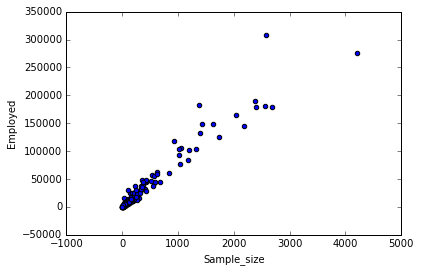

In [10]:
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')

It has other options as parameters as well. And additionally, it returns an `Axes` object that we can access later on if we need to tweak some of the properties

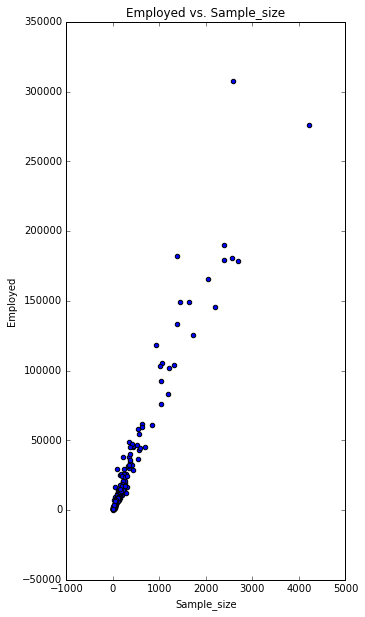

In [11]:
ax = recent_grads.plot(x='Sample_size', y='Employed',
                  kind='scatter', title='Employed vs. Sample_size',
                  figsize=(5,10))

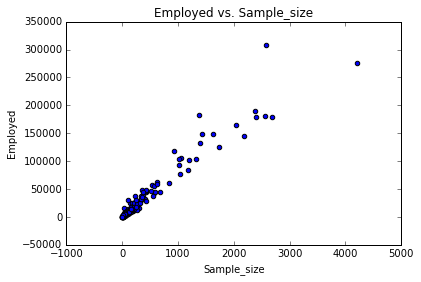

In [12]:
ax = recent_grads.plot(x='Sample_size', y='Employed', kind='scatter')
ax.set_title('Employed vs. Sample_size')

Now that we got that down, let's do some visual exploration

Now, we want to look for the following relations, and natually, the best choice would be a scatter plot:

- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

once plotted, use these plots to explore the following questions:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

Now I can do the individual plot route, but since it would be easier for me, personally, to see all the plots in a single figure, I've opted to use a multiple plot setup

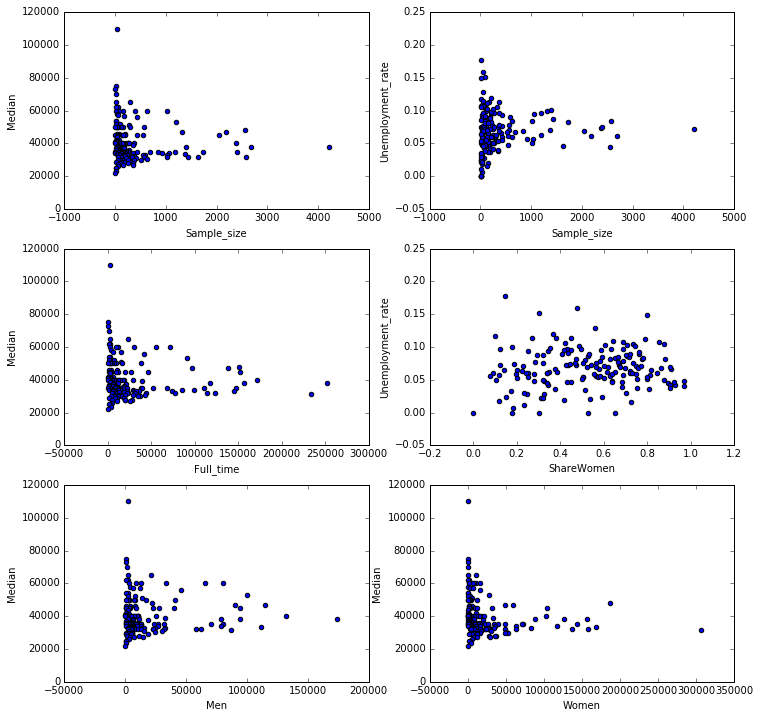

In [13]:
# 6 plots, so let's create a figure that'd take 6 subplots
# with 2 columns and 3 rows
fig, ax = plt.subplots(nrows=3,ncols=2)

recent_grads.plot(x='Sample_size',y='Median', ax=ax[0,0], kind='scatter')
recent_grads.plot(x='Sample_size',y='Unemployment_rate', ax=ax[0,1], kind='scatter')
recent_grads.plot(x='Full_time',y='Median', ax=ax[1,0], kind='scatter')
recent_grads.plot(x='ShareWomen',y='Unemployment_rate', ax=ax[1,1], kind='scatter')
recent_grads.plot(x='Men',y='Median', ax=ax[2,0], kind='scatter')
recent_grads.plot(x='Women',y='Median', ax=ax[2,1], kind='scatter')

# Seriously took a few minutes of my time just to experiment with figure size
fig.set_size_inches(12,12)

As we can see, it's hard to tell if it's not spread out, but we can sort of tell that there is a negative correlation with popularity and earnings. 

Even though we split the men and the women, we can see that, the more men, or women, a major has(popularity), the lower the median salary gets. 

Since we associate popularity with the number of students enrolled, let's see if the same holds true if we plot `Total` and `Median`

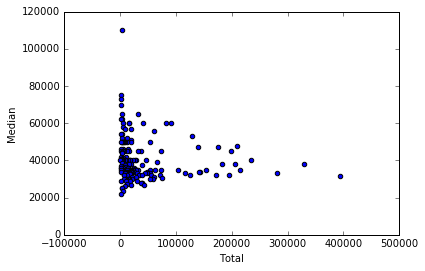

In [14]:
recent_grads.plot(x='Total',y='Median',kind='scatter')

So, our pretty much the same. 

Now, we'll try to find out if majors that popular *among* women make more money.  For this, we'll use `ShareWomen`, the ratio of women enrolled in a major and see what correlation, if there is, with `Median`.

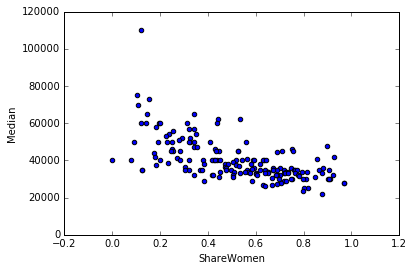

In [15]:
recent_grads.plot(x='ShareWomen',y='Median',kind='scatter')

And so we see, as a major increases in popularity among women, the median income  decreases. Therefore, we can conclude that there is a negative correlation.

And finally, since it's already been plotted, we see that for a field or position with the number of full-time employees increasing, the lesser ther Median salary. 

### Exploring Frequency Distributions

Eventually we'll need to ask some questions that pertain to frequency or distribution of values within a particular group or interval which important questions such as

- What is the percentage of majors in which at least 50% of the population is women?

Which can be answered with plots such as a histogram. 

The `DataFrame.plot()` and `Series.plot()` can easily create a histogram plot using th `kind='hist'` option but we're limited on what options we can put in.

However, just as matplotlib has different methods for different plots, such as, `pyplot.hist()` or `pyplot.scatter()`, these have also been extended to Pandas Series and Dataframes. So:

    Series.scatter()

will yield a scatter plot just as `Series.plot(kind='scatter')` would, but with more options

So, let's answer our own question with some code

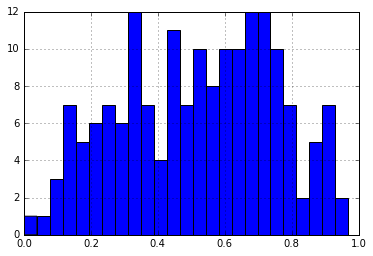

In [16]:
# The column we're after is ShareWomen - which is the the proportion of women to men
# enrolled in a particular major

recent_grads.ShareWomen.hist(bins=25)

Of course, we didn't do any sort of binsize calculation nor range inputs; We just want to see what it looks like, and clearly it'd be *easier* to answer our question just by looking at the graph than just looking at a frequency distribution table.

Anyway, the questions we're currently interested in are:

- What percent of majors are predominantly male? Predominantly female?

- What's the most common median salary range?

Let's just plot a few ranges and see what we get


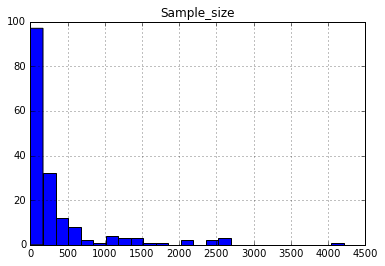

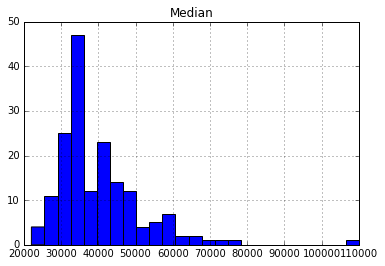

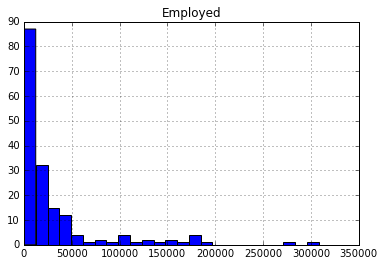

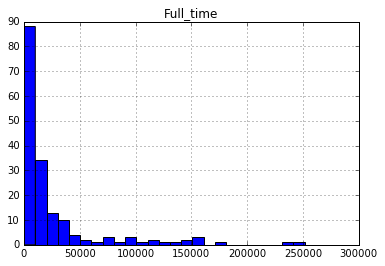

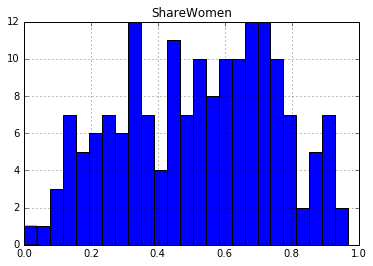

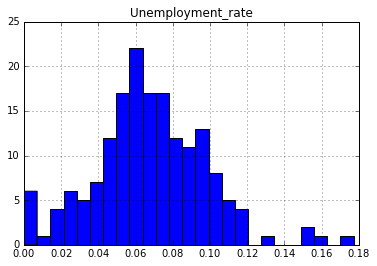

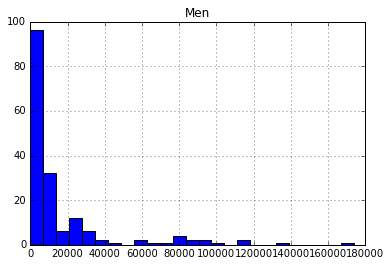

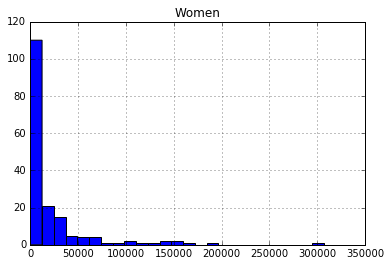

In [17]:
cols = ['Sample_size',
'Median',
'Employed',
'Full_time',
'ShareWomen',
'Unemployment_rate',
'Men',
'Women']

for c in cols:
    exec('ax = recent_grads.{c}.hist(bins=25)'.format(c=c))
    ax.set_title(c)
    plt.show()


Again since we're only focussing on the two questions, let's try to answer with the plots that were generate:

- What percent of majors are predominantly male? Predominantly female?

We can use the `ShareWomen` plot, but since the tick interval is by 0.2, it's hard to tell where the 50% mark is, so let's re-plot the `ShareWomen` histogram

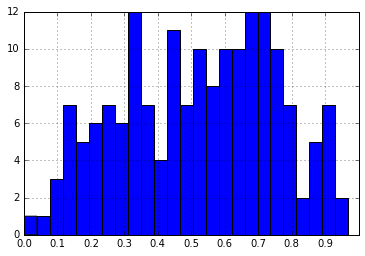

In [18]:
import numpy as np

ax = recent_grads.ShareWomen.hist(bins=25)
#ax.set_xlim(0.5,1)
ax.set_xticks(np.arange(0,1,0.1))


So we increased the xtick interval to accurately tell where the 50% mark is. Even though we can't accurately say, we can better approximate the percentage of majors in which women are the majority(We can say it's at least 50%)

And to answer the second:

- What's the most common median salary range?

Let's quickly pull up the `Median` plot

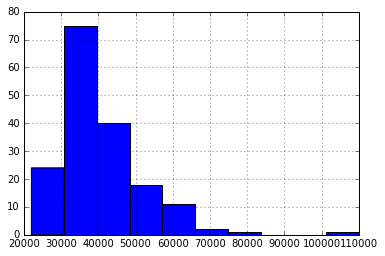

In [19]:
# In case we tweak some of the display options later on
ax = recent_grads.Median.hist()


We can see that the x labels get clipped. Instead of modifying the figure size to include the highest value(s), we can ommit them from the output by using the `range` option. Besides, we're only lookng for the *most common*, which is, of course, the range with the highest value.

Now, I want my ranges(personally) to be an even number, and just in the ten thousands interval. So, we'll figure out the range and the bin size.

From visually approximating, we can put the upper limit for our range to be 90,000, but we also want to have a tick interval of 10,000, and I am a bit OCD so i'll put the upper limit at 100,000. I want to use a bin size or 10(again, arbitrary). So:

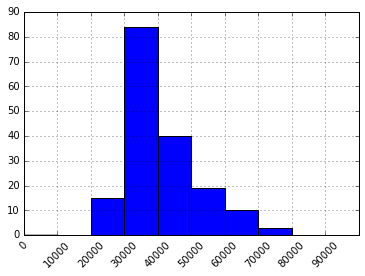

In [20]:
ax = recent_grads.Median.hist(bins=10, range=(0,100000))
ax.set_xticks(np.arange(0,100000,10000))
ax.set_xticklabels(np.arange(0,100000,10000), rotation=45)

And, output is much more clearer. Therefore, with this information, we can deduce that the 30,000-40,000 `Median` salary range has the most observations/occurrances.

### Visualising Frequencies and Relationships (Histograms and Scatterplots)

Previous sections demonstrate the uses and implementation of scatter plots and histograms to visualise relationships and frequencies. More often than not, we realise the need to compare both at the same time so get a much better understanding of what's going on, to better answer our questions, or even open up avenues to more meaningful questions. **Scatter matrix plots** allow us to plot both histograms and scatterplots side-by-side so we can quickly compare without having to scroll up and down often.

![Image from DataQuest](img/scatterplot_matrix_intro.png)

We can always use a multi-plot implementation but luckily Pandas already has that figured out. Pandas has a `scatter_matrix()` function and is under `pandas.plotting` and should be imported separately.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe84bd9e668>,
      dtype=object)

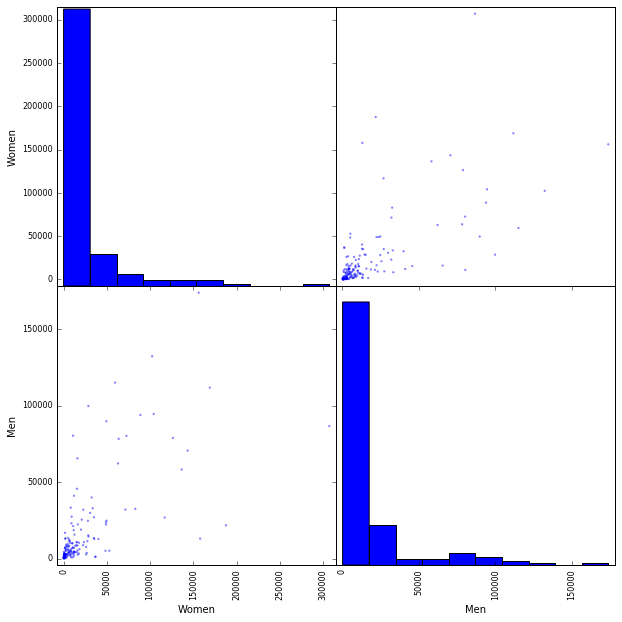

In [22]:
pd.plotting.scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

While passing in a DataFrame with 2 columns returns a 2 by 2 scatter matrix plot (4 plots total), passing in one with 3 returns a 3 by 3 scatter matrix plot (9 plots total). This means that the number of plots generated scales exponentially by a factor of 2, not linearly. If you increase the number of columns to 4 or more, the resulting grid of plots becomes unreadable and difficult to interpret (even if you increase the plotting area using the `figsize` parameter).

Now let's try to plot `Sample_size` and `Median`

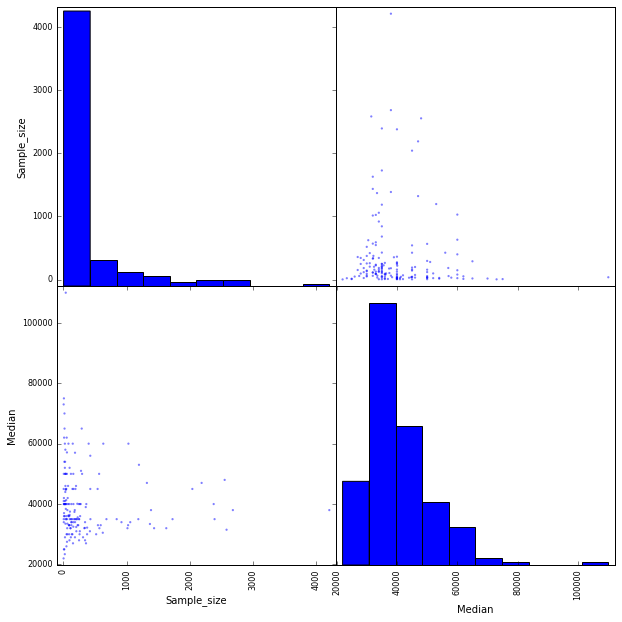

In [28]:
ax = pd.plotting.scatter_matrix(recent_grads[['Sample_size','Median']],figsize=(10,10))

#ax[0].set_xticks()

Basically, our takeaways from this is that, there are more observations for `Sample_size` at the lower end, and that `Median` salary increases. How we interpret it can be different -- It could mean that the bigger the sample size, the more accurate of a reading we will get for average salaries. But this could be a wrong interpretation since we are getting salaries for *ALL* majors and it presents new questions such as, "what are possible factors that contribute to higher salaries?" and we have to consider factors such as, the type of majors(*STEM,Arts,etc*) and genders of employed individuals, etc.

So that would be an unsafe assumption and we should not only be careful of what information to examine, but to also think of what questions to ask and possible follow-up questions.

Anyway, we can revisit some of our questions and see if we can deduce more information with additional techniques.

Looking back, we answered the question for the most common median salary range.

Now, let's modify that question:

- What is the most common median salary range for both genders? 

Now, I want to plot all three: `Median`,`Men`, and `Women` and see if there is any correlation

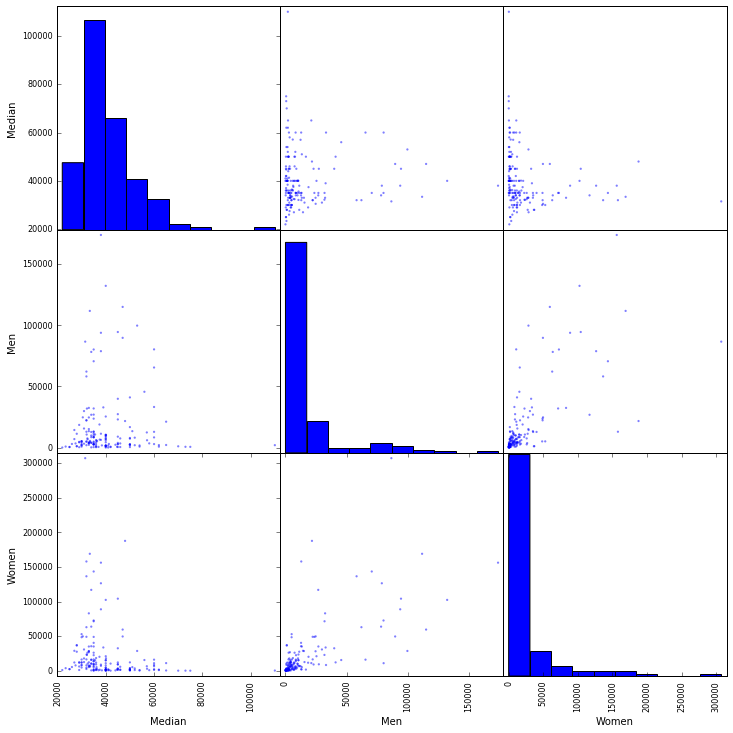

In [31]:
ax = pd.plotting.scatter_matrix(recent_grads[['Median','Men','Women']],figsize=(12,12))

Right away, we can deduce that in Majors with lesser number of enrollees, the Median salary is higher. Also, we can see that there are a lot more majors where  the total number of enrollees(both Men and Women) are lower. 

We can also see that median salaries are higher the lesser the total number of enrollees are. 

Lastly, we don't really see a difference whether it's male or female. (Difference in salaries between male and female in the same field, however, is a different story and can be answered in a different way)

But first, let's see the top 5 majors that have higher average salaries.

In [32]:
recent_grads.sort_values(by='Median', ascending=False).head(5)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


**NOTE**: The data is already ranked by highest paying majors, and was unnecessary. *BUT* in case it wasn't, then we can use the above method

So now, we can safely deduce from the info, that top 5 highest paying majors are all in the Engineering field.

I'm sure we still have a lot more possible questions we can ask, but let's leave that here for now...

### Comparing Values In A Category(Barplots)

So far, we've used Scatterplots to show relationships(or lack, thereof), Histograms to visualise frequency distributions, and Scatterplot Matrices as a combination of both. But if we want to compare different observations(rows) in a single category, all of these might not be the best choices.

Here comes a bar chart(or graph, depending on who you ask). We can easily compare a category for each observation with this method.

For example, we want to know the percentage of women(`ShareWomen`) per Major. Specifically, we want to see the percentage of women enrolled in a Major starting from the highest ranked to the lowest.

For the sake of output, we're going to only display the top and bottom 10.

Again, Pandas has a built-in library for plotting directly(and really is just extended with `matplotlib`)

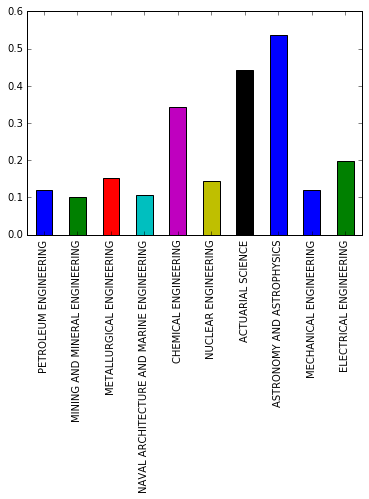

In [41]:
# plot first 10 rows for ShareWomen
ax = recent_grads.ShareWomen.head(10).plot.bar()
# added descriptive labels, instead of indexes
ax.set_xticklabels(recent_grads.Major.head(10))

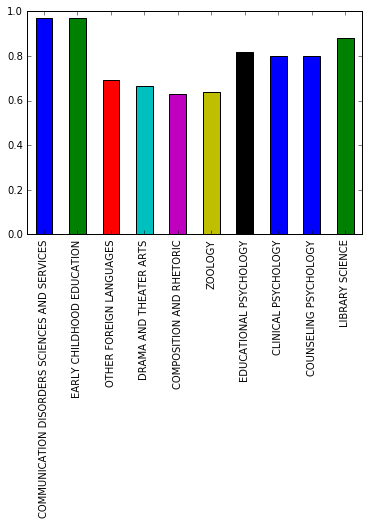

In [43]:
# Plot last 10
ax = recent_grads.ShareWomen.tail(10).plot.bar()
ax.set_xticklabels(recent_grads.Major.tail(10))

We can clearly see that the top 10 majors are all STEM programmes, and all, except `Astronomy and Astrophysics` all have a majority in enrolled men. 

And on the opposite end, the majority of enrollees are women. 

Why? This is a question that cannot be answered with the data that we have.

**NOTE**: Any hypotheses that we present(Gender bias, exclusivity, etc) are unsafe without sufficient data. At this point in our exercise, it's still unsafe and just plain wrong to do so.



Next, we want to see the rate of unemployment per major. Before we plot, we want to ask the question: 

- Do popular majors guarantee a better probability of getting hired?

So, let's do that again, but for the `Unemployment_rate` column:

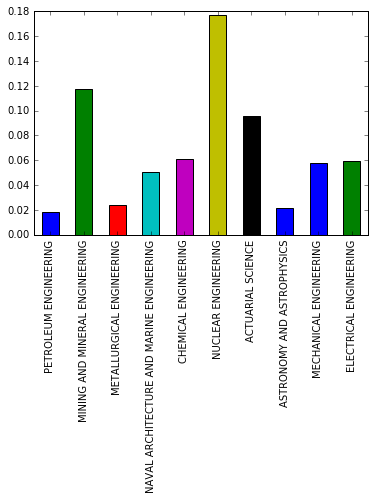

In [44]:
# plot first 10 rows for Unemployment_rate
ax = recent_grads.Unemployment_rate.head(10).plot.bar()
# added descriptive labels, instead of indexes
ax.set_xticklabels(recent_grads.Major.head(10))

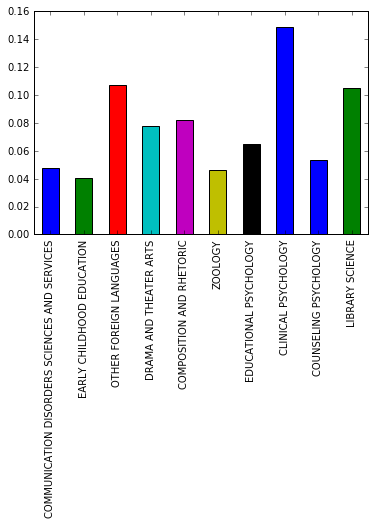

In [45]:
# plot first 10 rows for Unemployment_rate
ax = recent_grads.Unemployment_rate.tail(10).plot.bar()
# added descriptive labels, instead of indexes
ax.set_xticklabels(recent_grads.Major.tail(10))

So, we can visually deduce, that the rate of unemployment is *higher* in these higher ranked programs than it is for the bottome ranked ones.

Since we only looked at the top and bottom programs, we'd want to see an overview of *ALL* the entries, but using a bar plot would take up too much space the more observations we plot

Although it's not part of our exercise, I just want to introduce a line chart.

So again, let's see if our deductions are right(that is, the higher ranked the major is, the higher the occurrence of unemployment)

### Finally, A Line Chart...

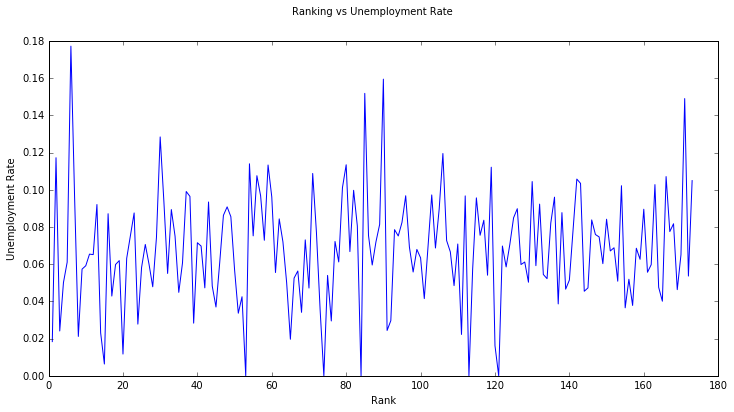

In [59]:
fig, ax = plt.subplots()

fig.set_size_inches(12,6)
fig.suptitle('Ranking vs Unemployment Rate')
ax.plot(recent_grads.Rank,recent_grads.Unemployment_rate)
ax.set_ylabel('Unemployment Rate')
ax.set_xlabel('Rank')
plt.show()

As we can see, just by looking at the graph, our initial deductions are totally incorrect.

So to conclude that, always make sure you double check and include *MORE* info before coming to any sort of conclusion.

### Final Thoughts

Reiterating the opening paragraph, we were able show the importance of visual exploration and how much we can learn just by looking at charts.

There are a lot more methods, graphs, and techniques we can use to answer more complex questions but hopefully this exercise gives us a clearer understanding of how to use the basics of visual exploration and how to answer some basic questions.

Some extra considerations we might be able to implement in the future and experiment on:

- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.

- Use a box plot to explore the distributions of median salaries and unemployment rate.

- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.